### Purpose

This demo will show the error in Kalman filtering functions.

(A) kf_fast.py (Currently used for all analysis)


(B) detailed_kf.py (Retro code updated to track trajectories of state estimation)

This error has not been resolved.

### Loading Parameters

Below, I load relevant parameters. 

In [1]:
import numpy as np

########################
# File Data
########################
filename0_ = 'Demo1'
savetopath_ = './'

########################
# Bayes Risk Parameters
########################
max_it_BR_ = 2
num_randparams_ = 10
space_size_ = np.arange(-8,3)
truncation_ =20
bayes_params_ = [max_it_BR_, num_randparams_, space_size_,truncation_]

########################
# Experiment Parameters
########################
n_train_ = 2000
n_predict_ = 48
n_testbefore_ = 49
multiplier_ = 20.0 
bandwidth_ = 50.0

exp_params_ = [n_train_, n_predict_, n_testbefore_, multiplier_, bandwidth_]

########################
# Truth Parameters
########################
apriori_f_mean_ = 0.0 
alpha_ = 1.0
f0_ = 10.0
p_ = -1 #1 #-2 #-1 #0.0
J_ = 2
jstart_ = 1 # (not zero)
pdf_type_u_ = 'Uniform'
      
true_noise_params_ = [apriori_f_mean_, pdf_type_u_, alpha_, f0_, p_, J_, jstart_]

########################
# Measurement Noise 
########################
msmt_noise_mean_ = 0.0 
msmt_noise_level_ = 0.01 

msmt_noise_params_ = [msmt_noise_mean_, msmt_noise_level_]

########################
# Kalman Parameters
########################
p0_ = 10000.0 
x0_ = 1.0
optimal_sigma_ = 0.1
optimal_R_ = 0.1
b_delta_ = 0.5 

max_it_ = 5

kalman_params_ = [optimal_sigma_, optimal_R_, x0_, p0_, b_delta_]

########################
# Skip Msmts
########################
skip =1


Now I create a Kalman object:

In [2]:
from ML_Kalman import Kalman

Test_Object = Kalman(filename0_, savetopath_, max_it_,
                     exp_params_, kalman_params_, msmt_noise_params_,
                     true_noise_params_, user_defined_variance=None, 
                     skip_msmts=skip)

There is a built-in test case method that checks truth vs. kalman predictions for any instance. Every time run_test_KF() is called, a new (truth, data) pair is generated for Kalman filtering. In particular, the fast memoryless Kalman Filter (green dots) and the detailed Kalman filter (purple hexagons) should be equal.

I will now run this:

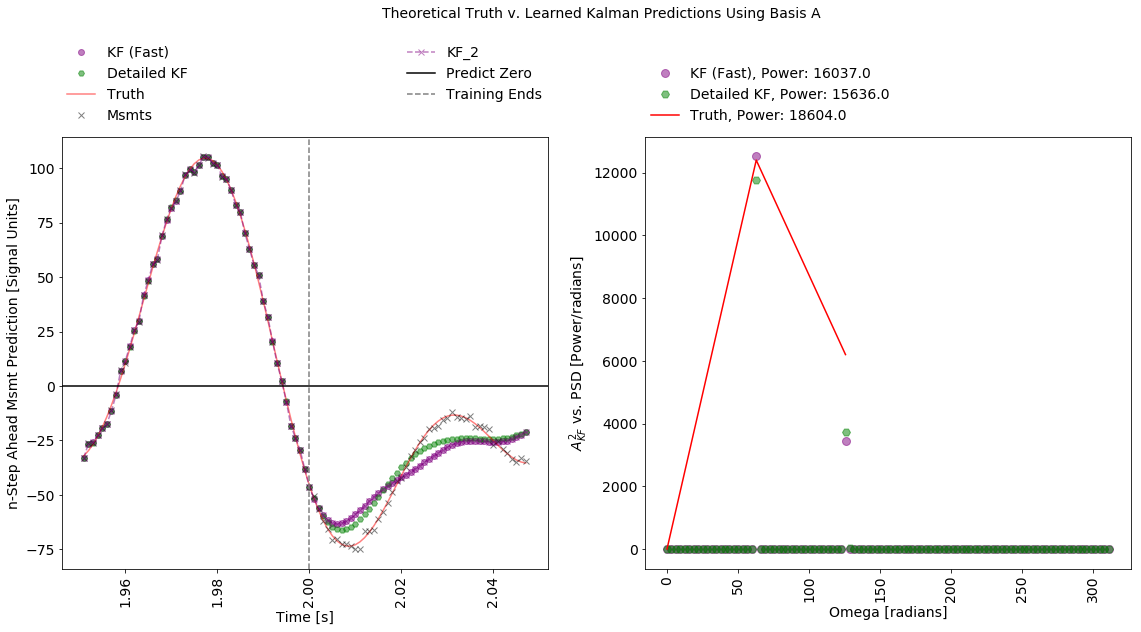

In [3]:
Test_Object.run_test_KF()